# Preparation

In [3]:
def replace_degree(df, columns = True):
    degree = "primary_alteration_primary_degree_secondary_alteration_secondary_degree"
    if columns:
        cols_w_degree_modified = {col: col.replace(degree, "degree") for col in df.columns if degree in col }
        df = df.rename(columns=cols_w_degree_modified)
    else:
        df = df.map(lambda v: v.replace(degree, "degree") if isinstance(v, str) and degree in v else v)
    return df

In [4]:
import pandas as pd
data_new = pd.read_csv("scripts/wandb_logs/wandb_nas_new.csv")#
len(data_new)

76

In [42]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
#data= pd.read_csv("scripts/wandb_logs/wandb_nas_new.csv")#
# concatenating the results of two NAS searches
data_new = pd.read_csv("scripts/wandb_logs/wandb_nas_more_freeze.csv")#
#data["Name"] = data_new["Name"].apply(lambda x: "new_" + x)
data_old = pd.read_csv("scripts/wandb_logs/wandb_nas_more_1_wo_60.csv")
data = pd.concat([data_new, data_old], ignore_index=True)
data = replace_degree(data)
len(data)

116

In [6]:
data.head()

,Name,State,Created,Group,seed,train/learning_rate,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,...,eval/accuracy,quality.activation_fn,inversion.activation_fn,degree.activation_fn,key_pc_mode.activation_fn,inversion.linear_layers_dim,test/degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
0,trial_60,finished,2025-09-02T18:25:22.000Z,nas_layers_extended_new,42,0.000048,0.753997,0.838685,0.863146,0.862059,...,0.829472,"[""tanh"",""relu""]","[""tanh"",""gelu"",""relu"",""relu"",""tanh"",""tanh""]","[""tanh""]","[""gelu"",""relu""]","[217,209,688,176,391,83]",NaN,NaN,NaN,NaN
1,trial_59,finished,2025-09-02T18:08:50.000Z,nas_layers_extended_new,42,0.000147,0.736468,0.829641,0.858425,0.853771,...,0.819576,"[""tanh""]","[""tanh"",""gelu"",""tanh"",""relu""]","[""tanh""]","[""gelu""]","[215,233,630,168]",NaN,NaN,NaN,NaN
2,trial_58,finished,2025-09-02T17:38:35.000Z,nas_layers_extended_new,42,0.000042,0.758559,0.839482,0.868861,0.867130,...,0.833508,"[""tanh""]","[""tanh"",""gelu"",""tanh"",""relu"",""tanh""]","[""tanh""]","[""gelu""]","[168,207,589,301,299]",NaN,NaN,NaN,NaN
3,trial_57,finished,2025-09-02T17:08:21.000Z,nas_layers_extended_new,42,0.000058,0.750173,0.830685,0.866130,0.862716,...,0.827426,"[""gelu"",""tanh"",""gelu""]","[""tanh"",""tanh"",""relu"",""gelu""]","[""relu"",""relu"",""tanh""]","[""gelu"",""tanh"",""tanh""]","[435,78,129,166]",NaN,NaN,NaN,NaN
4,trial_56,finished,2025-09-02T16:44:57.000Z,nas_layers_extended_new,42,0.000027,0.740989,0.828199,0.855739,0.860999,...,0.821481,"[""tanh"",""gelu""]","[""tanh"",""gelu"",""relu"",""relu""]","[""relu"",""relu""]","[""gelu"",""tanh"",""tanh"",""gelu""]","[288,330,467,197]",NaN,NaN,NaN,NaN


In [7]:
data =data.sort_values(by = ["eval/accuracy"], ascending=False)
data[["Name", "eval/accuracy", "freeze_layers", "batch_size", "learning_rate"]].head(10)

,Name,eval/accuracy,freeze_layers,batch_size,learning_rate
23,trial_35,0.833966,2,4,0.000174
2,trial_58,0.833508,0,4,0.000123
18,trial_41,0.832363,1,4,0.000223
12,trial_47,0.831511,8,4,0.000153
81,trial_37,0.831423,7,4,0.000113
74,trial_44,0.830652,7,4,0.000203
0,trial_60,0.829472,0,4,0.000135
78,trial_40,0.829468,7,4,0.000409
19,trial_39,0.829408,0,4,0.000052
13,trial_46,0.828854,6,4,0.000210


In [8]:
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]

In [9]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed', 'train/learning_rate',
       'eval/degree_accuracy', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy', 'eval/inversion_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'inversion.pooler_dropout',
       'degree.pooler_dropout', 'quality.pooler_dropout',
       'key_pc_mode.pooler_dropout', 'degree.normalisation',
       'quality.normalisation', 'key_pc_mode.normalisation',
       'inversion.normalisation', 'degree.linear_layers_dim',
       'quality.linear_layers_dim', 'key_pc_mode.linear_layers_dim',
       'quality.num_linear_layers', 'degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy', 'quality.activation_fn',
       'inversion.activation_fn', 'degree.activation_fn',
       'key_pc_mode.activation_fn', 'inversion.linear_layers_dim',
       'test/degree_accuracy', 'test/quality_accuracy'

In [10]:
parameters = set([col.split(".")[-1] for col in data.columns.values if "eval" not in col])

In [11]:
parameters_to_check = ["activation_fn", "normalisation", "pooler_dropout", "num_linear_layers", "linear_layers_dim"]
for parameter in parameters_to_check:
    column_names = set([col for col in data.columns.values if parameter in col])
    if len(column_names) != 4:
        print(parameter)
        print(column_names)

In [12]:
from ast import literal_eval

# converting arrays from strings back to arrays
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
columns_to_convert = [column for column in data_filtered.columns if (column.endswith("activation_fn") or column.endswith("normalisation"))]
for column in columns_to_convert:
    data_filtered[column] = data_filtered[column] .apply(literal_eval)
data_filtered.head()

/tmp/ui556004/login23-1_429922/ipykernel_441242/316338089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = data_filtered[column] .apply(literal_eval)


,Name,State,Group,seed,train/learning_rate,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,freeze_layers,...,eval/accuracy,quality.activation_fn,inversion.activation_fn,degree.activation_fn,key_pc_mode.activation_fn,inversion.linear_layers_dim,test/degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
23,trial_35,finished,nas_layers_extended_new,42,0.000040,0.758901,0.846867,0.865737,0.864358,2,...,0.833966,"[tanh, tanh]","[tanh, tanh, tanh, relu]","[tanh, gelu, relu]","[gelu, tanh]","[309,152,187,206]",NaN,NaN,NaN,NaN
2,trial_58,finished,nas_layers_extended_new,42,0.000042,0.758559,0.839482,0.868861,0.867130,0,...,0.833508,[tanh],"[tanh, gelu, tanh, relu, tanh]",[tanh],[gelu],"[168,207,589,301,299]",NaN,NaN,NaN,NaN
18,trial_41,finished,nas_layers_extended_new,42,0.000057,0.755766,0.844748,0.862372,0.866566,1,...,0.832363,"[tanh, relu]","[tanh, gelu, tanh, relu]",[tanh],"[gelu, tanh]","[233,125,350,156]",NaN,NaN,NaN,NaN
12,trial_47,finished,nas_layers_extended_new,42,0.000036,0.757309,0.837957,0.865992,0.864786,8,...,0.831511,[relu],"[tanh, tanh, relu, relu]","[relu, gelu, relu]","[relu, tanh, tanh]","[400,313,196,51]",NaN,NaN,NaN,NaN
81,trial_37,finished,attemtping_nas_1,42,0.000002,0.756280,0.836128,0.867276,0.866007,7,...,0.831423,"[tanh, relu, gelu, tanh, relu]","[relu, relu, relu, relu]","[relu, gelu, relu, tanh]","[gelu, tanh, gelu, tanh, relu, relu]","[137,491,228,72]",NaN,NaN,NaN,NaN


In [13]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval.head(4)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
23,trial_35,0.758901,0.846867,0.865737,0.864358,0.833966
2,trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
18,trial_41,0.755766,0.844748,0.862372,0.866566,0.832363
12,trial_47,0.757309,0.837957,0.865992,0.864786,0.831511


# Analysis

In [21]:
# adding test accuracies from the paper
baseline_paper = { 
    "Name" : "baseline (paper)",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/degree_accuracy': 0.762,

}
baseline_paper["eval/accuracy"] = float(np.mean(list(baseline_paper.values())[1:]))
baseline_paper

{'Name': 'baseline (paper)',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [22]:
# adding evaluation accuracies from the recreated experiment by finetune.py
baseline_eval = { 
    "Name" : "baseline (eval)",
     'eval/inversion_accuracy': 0.8664,
            'eval/key_pc_mode_accuracy': 0.8329,
            "eval/quality_accuracy": 0.86623,
            'eval/degree_accuracy': 0.7565,

}
baseline_eval["eval/accuracy"] = float(np.mean(list(baseline_eval.values())[1:]))
baseline_eval

{'Name': 'baseline (eval)',
 'eval/inversion_accuracy': 0.8664,
 'eval/key_pc_mode_accuracy': 0.8329,
 'eval/quality_accuracy': 0.86623,
 'eval/degree_accuracy': 0.7565,
 'eval/accuracy': 0.8305075}

In [23]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False).head(10)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
2,trial_35,0.758901,0.846867,0.865737,0.864358,0.833966
3,trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
4,trial_41,0.755766,0.844748,0.862372,0.866566,0.832363
5,trial_47,0.757309,0.837957,0.865992,0.864786,0.831511
6,trial_37,0.756280,0.836128,0.867276,0.866007,0.831423
1,baseline (paper),0.762000,0.822000,0.867000,0.872000,0.830750
7,trial_44,0.755756,0.836752,0.864800,0.865300,0.830652
0,baseline (eval),0.756500,0.832900,0.866230,0.866400,0.830507
8,trial_60,0.753997,0.838685,0.863146,0.862059,0.829472
9,trial_40,0.752601,0.837870,0.860987,0.866415,0.829468


In [24]:

for target in targets:
    best_acc_paper = []
    best_acc_eval = []
    acc_column = f"eval/{target}_accuracy"
    baseline_acc_paper = baseline_paper[acc_column]
    baseline_acc_eval = baseline_eval[acc_column]
    for index, row in df_baseline.iterrows():
        col_name = row["Name"]
        if (row[acc_column] >= baseline_acc_paper and "baseline" not in col_name):
            best_acc_paper.append (col_name)
        if (row[acc_column] >= baseline_acc_eval and "baseline" not in col_name):
            best_acc_eval.append (col_name)
    print(f"for {target} trials better than paper are {best_acc_paper} ")

for inversion trials better than paper are [] 
for quality trials better than paper are ['trial_58', 'trial_37'] 
for degree trials better than paper are [] 
for key_pc_mode trials better than paper are ['trial_35', 'trial_58', 'trial_41', 'trial_47', 'trial_37', 'trial_44', 'trial_60', 'trial_40', 'trial_39', 'trial_46', 'trial_24', 'trial_14', 'trial_13', 'trial_55', 'trial_36', 'trial_29', 'trial_57', 'trial_45', 'trial_27', 'trial_54', 'trial_38', 'trial_50', 'trial_26', 'trial_55', 'trial_52', 'trial_28', 'trial_56', 'trial_23', 'trial_16', 'trial_12', 'trial_33', 'trial_64', 'trial_26', 'trial_37', 'trial_15', 'trial_41', 'trial_53', 'trial_30', 'trial_18', 'trial_31', 'trial_34', 'trial_19', 'trial_25', 'trial_63', 'trial_58', 'trial_5', 'trial_39', 'trial_22', 'trial_35', 'trial_49', 'trial_15', 'trial_56', 'trial_7', 'trial_19', 'trial_1', 'trial_61', 'trial_54', 'trial_21', 'trial_52', 'trial_2', 'trial_48', 'trial_12', 'trial_59', 'trial_31', 'trial_24', 'trial_17', 'trial_3

In [45]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/key_pc_mode_accuracy"], ascending=False).head(20)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
2,new_trial_35,0.758901,0.846867,0.865737,0.864358,0.833966
4,new_trial_41,0.755766,0.844748,0.862372,0.866566,0.832363
29,new_trial_23,0.744227,0.843667,0.862439,0.853295,0.825907
40,new_trial_18,0.739337,0.840943,0.859188,0.855051,0.823630
3,new_trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
43,new_trial_19,0.736462,0.839307,0.860559,0.857081,0.823352
10,new_trial_39,0.751193,0.838899,0.864441,0.863100,0.829408
15,new_trial_55,0.753403,0.838831,0.860492,0.858810,0.827884
8,new_trial_60,0.753997,0.838685,0.863146,0.862059,0.829472
21,new_trial_54,0.754186,0.838388,0.860633,0.855864,0.827268


In [15]:
from optuna.importance import get_param_importances, FanovaImportanceEvaluator
import optuna
pruner = optuna.pruners.MedianPruner(n_warmup_steps=0)
sampler = optuna.samplers.TPESampler(seed=42, 
                                         multivariate=True,
                                         warn_independent_sampling=False)
study = optuna.create_study(study_name="nas_layers_extended_new",
                                directions= ["maximize", "maximize","maximize", "maximize"],
                                sampler = sampler,
                                pruner = pruner,
                                storage = "sqlite:///optuna_nas.db",
                                load_if_exists=True )
best_trials = study.best_trials
print(best_trials)
# quality, inversion, key,  degree

/home/ui556004/projects/musicbert_hf/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ui556004/projects/musicbert_hf/.venv/lib64/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-09-05 13:34:47,520] Using an existing study with name 'nas_layers_extended_new' instead of creating a new one.


[FrozenTrial(number=35, state=1, values=[0.8657369073248171, 0.8643578293369576, 0.8468666662859688, 0.7589011917746421], datetime_start=datetime.datetime(2025, 9, 2, 7, 35, 57, 449395), datetime_complete=datetime.datetime(2025, 9, 2, 8, 4, 41, 370221), params={'num_linear_layers_quality': 2, 'layer_dim_quality_0': 560, 'layer_dim_quality_1': 736, 'layer_dim_quality_2': 415, 'layer_dim_quality_3': 295, 'layer_dim_quality_4': 95, 'layer_dim_quality_5': 153, 'activation_fn_quality_0': 'tanh', 'activation_fn_quality_1': 'tanh', 'activation_fn_quality_2': 'gelu', 'activation_fn_quality_3': 'tanh', 'activation_fn_quality_4': 'relu', 'activation_fn_quality_5': 'gelu', 'pooler_dropout_quality_0': 0.45476769903959746, 'pooler_dropout_quality_1': 0.29369758218489855, 'pooler_dropout_quality_2': 0.06923862379172478, 'pooler_dropout_quality_3': 0.3302709924805644, 'pooler_dropout_quality_4': 0.203566225661692, 'pooler_dropout_quality_5': 0.1694098167418744, 'normalisation_quality_0': 'layer', 'no

In [ ]:
import optuna
from optuna.trial import TrialState
from optuna.importance import FanovaImportanceEvaluator, get_param_importances

def some_condition(t: optuna.trial.FrozenTrial) -> bool:
    return t.number == 60

valid_trials = [
    t for t in study.get_trials(deepcopy=False)
    if t.state == TrialState.COMPLETE and not some_condition(t)
]

class FilteredStudy:
    def __init__(self, base_study: optuna.Study, trials):
        self._trials = trials
        self.directions = base_study.directions 

  
    def get_trials(self, deepcopy: bool = True, states=None):
        if states is None:
            out = self._trials
        else:
            allowed = set(states)
            out = [t for t in self._trials if t.state in allowed]
        # optuna returns FrozenTrials; 
        # copying isn’t required for importance
        return list(out)

    def _is_multi_objective(self) -> bool:
        return len(self.directions) > 1



In [17]:
import itertools
from IPython.display import display
filtered_study = FilteredStudy(study, valid_trials)

# quality, inversion, key,  degree
def calculate_importance(target,filtered_study, num_reps = 10):
    targets = ["quality", "inversion", "key",  "degree"]
    imps_all = {}
    target_index = targets.index(target)
    for i in range(num_reps):
        imps = get_param_importances(
            filtered_study,
            target=lambda t: t.values[target_index],
            evaluator=FanovaImportanceEvaluator(),
        )
        for k, v in imps.items():
            imps_all.setdefault(k, []).append(float(v))
    imps_mean = {parameter: float(np.mean(values)) for parameter, values in imps_all.items()}
    imps_filtered = {parameter : importance for parameter, importance  in imps_mean.items() if importance > 0.05}
    df = pd.Series(imps_filtered).reset_index()
    df.columns = ["parameter", "avg_importance"]

    print(f"importance for {target}")
    df = df.sort_values(by = ["avg_importance"], ascending=False)
    df = replace_degree(df, columns=False)
    display(df)

In [18]:
targets = ["quality", "inversion", "key",  "degree"]
filtered_study = FilteredStudy(study, valid_trials)
for target in targets:
    calculate_importance(target, filtered_study, num_reps= 50)

importance for quality


,parameter,avg_importance
0,learning_rate,0.793738


importance for inversion


,parameter,avg_importance
0,learning_rate,0.664827


importance for key


,parameter,avg_importance
0,learning_rate,0.374929
2,pooler_dropout_inversion_3,0.076453
3,pooler_dropout_key_pc_mode_1,0.070056
4,activation_fn_degree_0,0.063438
1,num_linear_layers_degree,0.058888


importance for degree


,parameter,avg_importance
0,learning_rate,0.459935
1,num_linear_layers_degree,0.065566


# Visualisations

In [ ]:
import matplotlib
matplotlib.rc("axes", labelsize= 14)
matplotlib.rc("xtick", labelsize = 12) 
matplotlib.rc("ytick", labelsize = 12) 

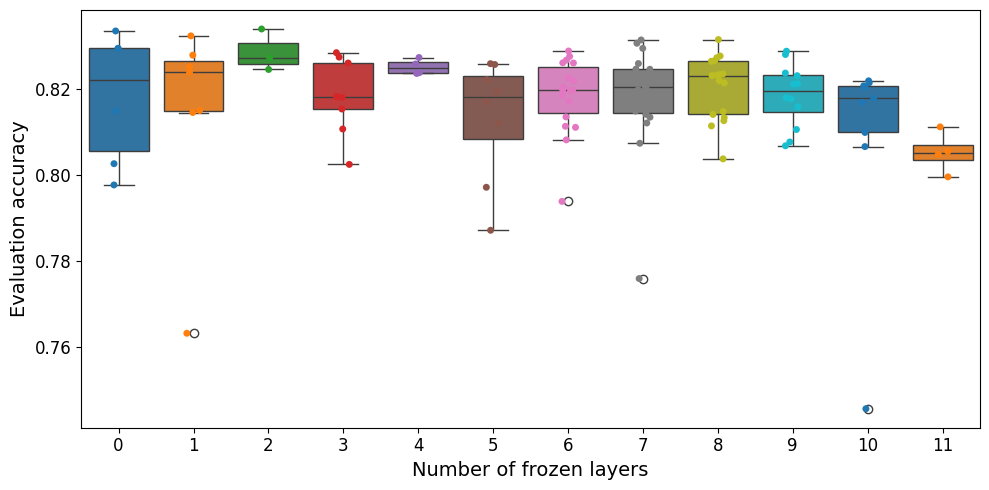

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.stripplot(data=data_filtered,  x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)
sns.boxplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of frozen layers")
plt.ylabel("Evaluation accuracy")
plt.legend('',frameon=False)
plt.tight_layout()
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.savefig("figures/frozen_layers_vs_eval_acc.png", bbox_inches="tight")
plt.show()

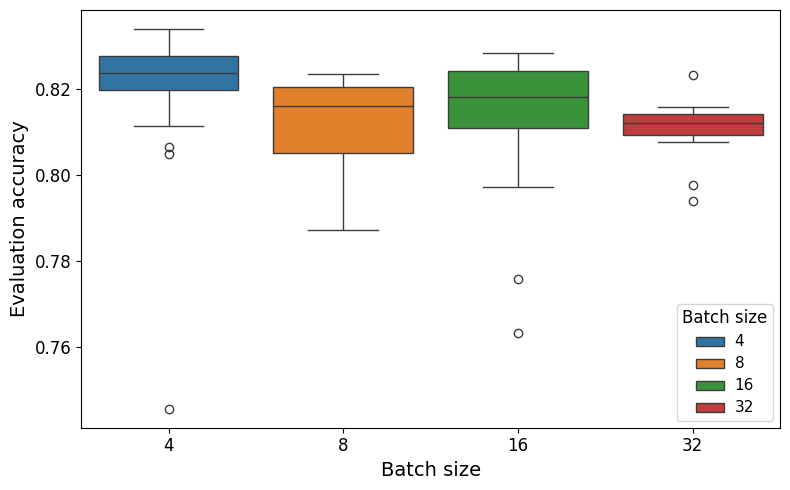

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))
f = sns.boxplot(data=data_filtered,x='batch_size', y='eval/accuracy', hue='batch_size', palette='tab10', dodge=False)
f.legend_.set_title(title="Batch size")
plt.setp(f.get_legend().get_texts(), fontsize='11') # for legend text
plt.setp(f.get_legend().get_title(), fontsize='12') # for legend title
# Adjust plot
plt.xlabel("Batch size", size = 14)
plt.ylabel("Evaluation accuracy", size = 14)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("figures/batch_size_vs_eval_acc.png",  bbox_inches="tight")
plt.show()

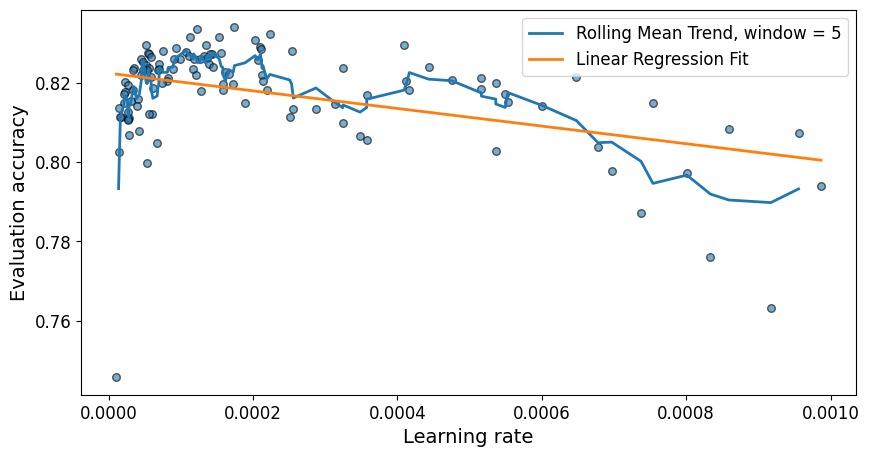

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

#  linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 5, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend, window = 5')
ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

#ax.legend()

ax.set_xlabel("Learning rate")
ax.set_ylabel("Evaluation accuracy")
ax.legend(fontsize = 12)
plt.savefig("figures/learning_rate_vs_eval_acc.png",  bbox_inches="tight")
plt.show()

## 4 by 4 plots

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def display_four(data_filtered, parameter, targets= None, mode = False, box = False, full_name = None):

    df = data_filtered.copy()

    def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
    
    suffix = ".mode" if mode else ""
    # Define targets with possible column-name variants
    targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
    axes = axes.ravel()

    for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
        layer_col = pick_col(df, layer_cands)
        acc_col   = pick_col(df, acc_cands)
        #ax.set_ylim(0.7, 0.9)
        try:
            order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
        except Exception:
            order = sorted(df[layer_col].dropna().astype(str).unique())

        plot_df = df.copy()
        plot_df[layer_col] = plot_df[layer_col].astype(str)
        # if mode:
        #     order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    
        if box:
            sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        else:
            sns.stripplot(
                data=plot_df, x=layer_col, y=acc_col,
                order=order, jitter=True, size=5, ax=ax
            )


            means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                            .mean()
                            .reindex(order))
            ax.plot(order, means.values, marker='o')

        ax.set_xlabel(f"{parameter}")
        ax.set_ylabel(f"Evaluation accuracy")
        ax.set_title(f" {name}")
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    fig.suptitle(f"Accuracy per {full_name} (by target)", y=0.98)
    plt.tight_layout()
    suffix = "with_mode" if mode else ""
    plt.savefig(f"figures/{parameter}_{suffix}_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return targets

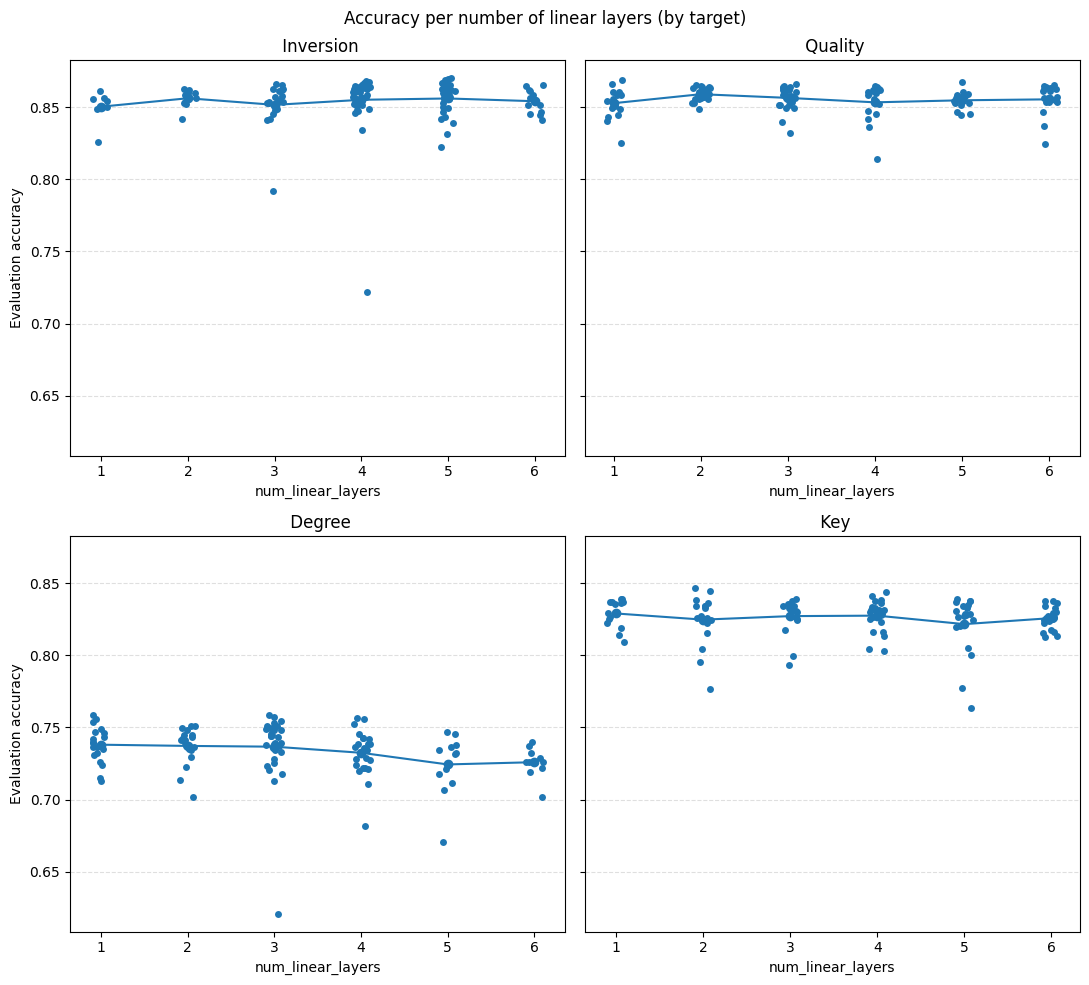

In [43]:
targets =display_four(data_filtered, parameter= "num_linear_layers", full_name = "number of linear layers", box = False)

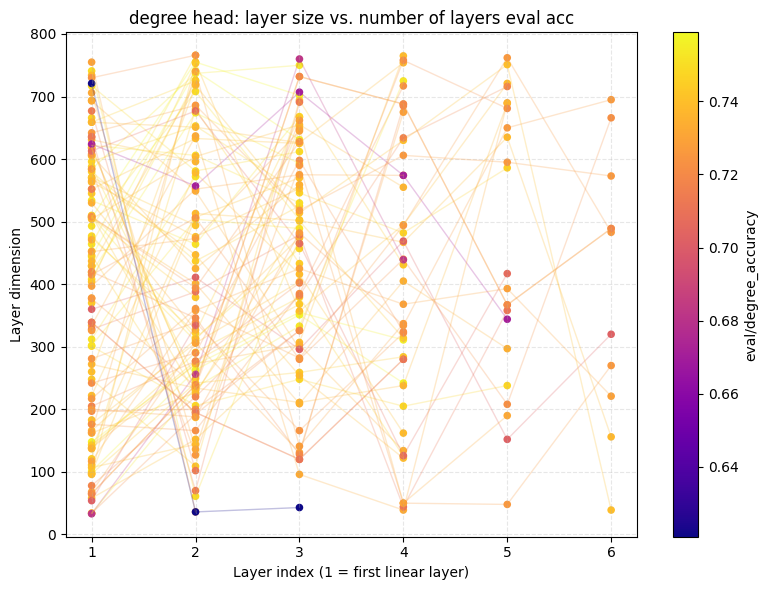

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
target = "degree"
target_columns = [column for column in data_filtered.columns.values if target  in column]
df_target = data_filtered[target_columns]
df = df_target.copy()

def parse_dims(v):
    if isinstance(v, (list, tuple, np.ndarray)):
        return list(map(int, v))
    if pd.isna(v):
        return []
    if isinstance(v, str):
        v = v.strip()
        try:
            out = literal_eval(v)
            if isinstance(out, (list, tuple)):
                return list(map(int, out))
        except Exception:
            v = v.strip("[]()")
            parts = [p.strip() for p in v.split(",") if p.strip()]
            try:
                return [int(p) for p in parts]
            except Exception:
                return []
    return []

df["__dims__"] = df[f"{target}.linear_layers_dim"].apply(parse_dims)


rows = []
for ridx, row in df.iterrows():
    try:
        n_layers = int(row[f"{target}.num_linear_layers"])
    except Exception:

        try:
            n_layers = int(str(row[f"{target}.num_linear_layers"]).strip())
        except Exception:
            continue

    dims = row["__dims__"]
    acc = float(row[f"eval/{target}_accuracy"])
    n = min(n_layers, len(dims))
    for layer_idx in range(1, n + 1):
        rows.append({
            "row_id": ridx,
            "layer": layer_idx,
            "dim": dims[layer_idx - 1],
            "acc": acc
        })

long_df = pd.DataFrame(rows)
if long_df.empty:
    raise ValueError("No points to plot: check your columns and data parsing.")


fig, ax = plt.subplots(figsize=(8, 6))
norm = plt.Normalize(long_df["acc"].min(), long_df["acc"].max())
cmap = plt.cm.plasma

for rid, g in long_df.groupby("row_id"):
    color = cmap(norm(g["acc"].iloc[0]))
    ax.plot(g["layer"], g["dim"], color=color, alpha=0.25, linewidth=1)

sc = ax.scatter(
    long_df["layer"],
    long_df["dim"],
    c=long_df["acc"],
    cmap=cmap,
    norm=norm,
    s=30,
    edgecolors="none"
)

ax.set_xlabel("Layer index (1 = first linear layer)")
ax.set_ylabel("Layer dimension")
ax.set_xticks([1, 2, 3, 4, 5, 6]) 
ax.set_title(f"{target} head: layer size vs. number of layers eval acc")
cb = fig.colorbar(sc, ax=ax)
cb.set_label(f"eval/{target}_accuracy")

ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [30]:
import statistics 
def get_mode(parameter, target, data):
    statistics.mode(data_filtered[f"{target}.{parameter}"][0])
    data[f"{target}.{parameter}.mode"] =  data_filtered[f"{target}.{parameter}"].apply(lambda x : statistics.mode(x))
    return data

In [31]:
def create_df_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) == 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: v[0]
    )
    return df_target

In [32]:
def create_df_parameter(df, target, parameter):
    # Check if all activations are the same
    def check_unique(v):
        unique = set(v)
        return list(unique)[0] if len(unique) == 1 else "mix"
    print(f"{target}.{parameter}")
    df_target = df[[f"{target}.{parameter}", f"eval/{target}_accuracy"]].copy()
    
    df_target[f"{target}.{parameter}_unique"] = df_target[f"{target}.{parameter}"].apply(check_unique)
    return df_target

In [33]:
def create_df_not_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) > 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: "mix"
    )
    return df_target

inversion.activation_fn
quality.activation_fn
degree.activation_fn
key_pc_mode.activation_fn


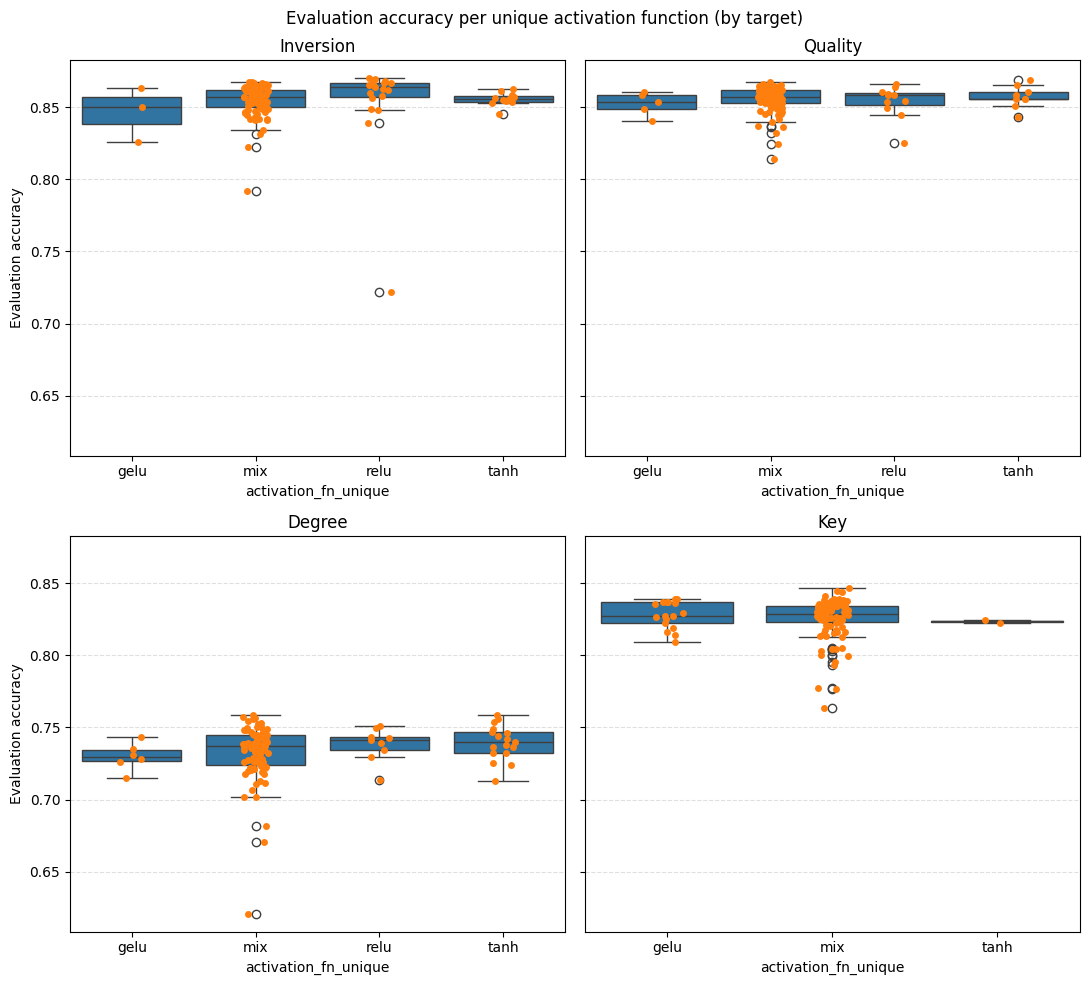

In [35]:
import seaborn as sns
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "activation_fn")
    df_activation_array.append(df_target)
parameter = "activation_fn_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

inversion.normalisation
quality.normalisation
degree.normalisation
key_pc_mode.normalisation


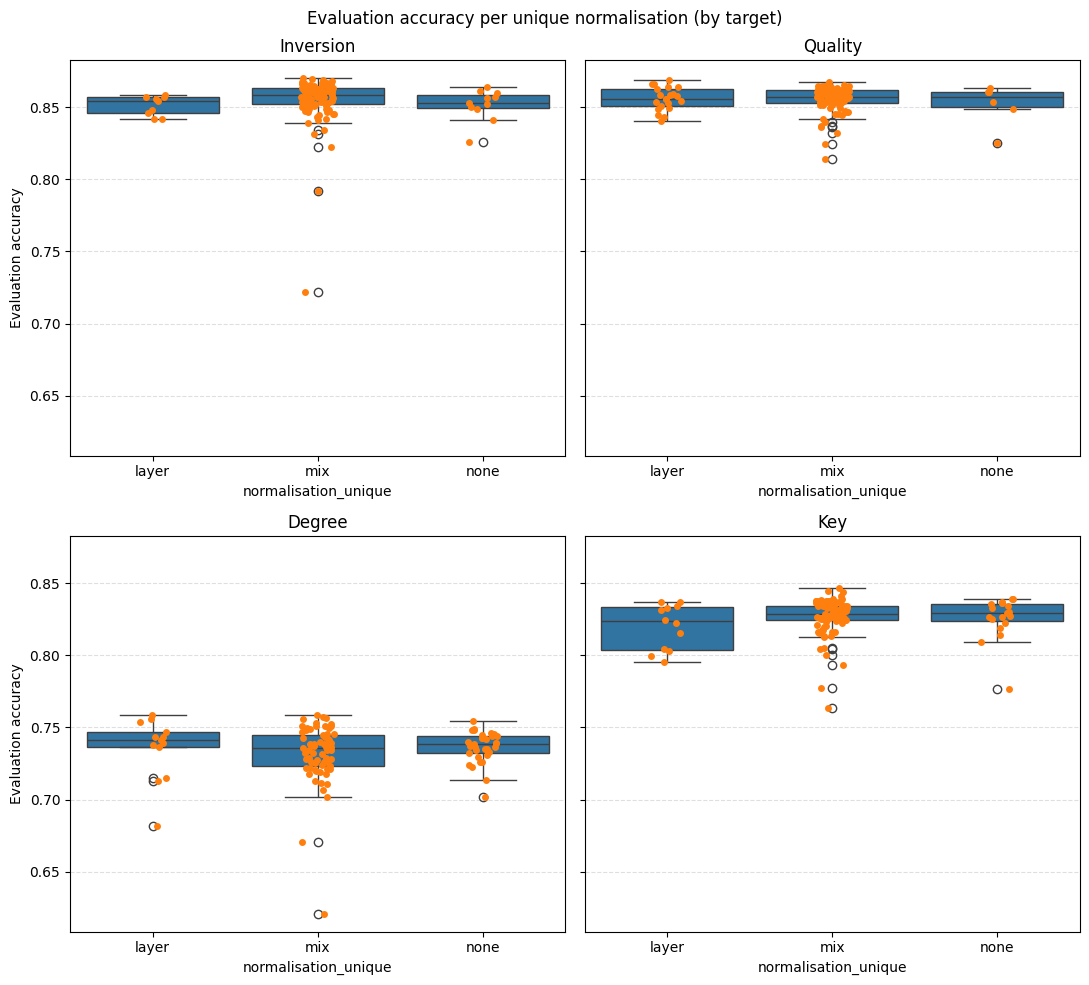

In [37]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "normalisation")
    df_activation_array.append(df_target)
parameter = "normalisation_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique normalisation (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [38]:
targets = ["inversion", "quality", "key_pc_mode","degree" ]
parameter = "activation_fn"
data_filtered_copy = data_filtered.copy()
for target in targets:
    data_filtered_copy=  get_mode(parameter, target, data_filtered_copy)
data_filtered_copy.head()

,Name,State,Group,seed,train/learning_rate,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,freeze_layers,...,key_pc_mode.activation_fn,inversion.linear_layers_dim,test/degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy,inversion.activation_fn.mode,quality.activation_fn.mode,key_pc_mode.activation_fn.mode,degree.activation_fn.mode
23,new_trial_35,finished,nas_layers_extended_new,42,0.000040,0.758901,0.846867,0.865737,0.864358,2,...,"[gelu, tanh]","[309,152,187,206]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
2,new_trial_58,finished,nas_layers_extended_new,42,0.000042,0.758559,0.839482,0.868861,0.867130,0,...,[gelu],"[168,207,589,301,299]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
18,new_trial_41,finished,nas_layers_extended_new,42,0.000057,0.755766,0.844748,0.862372,0.866566,1,...,"[gelu, tanh]","[233,125,350,156]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
12,new_trial_47,finished,nas_layers_extended_new,42,0.000036,0.757309,0.837957,0.865992,0.864786,8,...,"[relu, tanh, tanh]","[400,313,196,51]",NaN,NaN,NaN,NaN,tanh,relu,tanh,relu
81,trial_37,finished,attemtping_nas_1,42,0.000002,0.756280,0.836128,0.867276,0.866007,7,...,"[gelu, tanh, gelu, tanh, relu, relu]","[137,491,228,72]",NaN,NaN,NaN,NaN,relu,tanh,gelu,relu


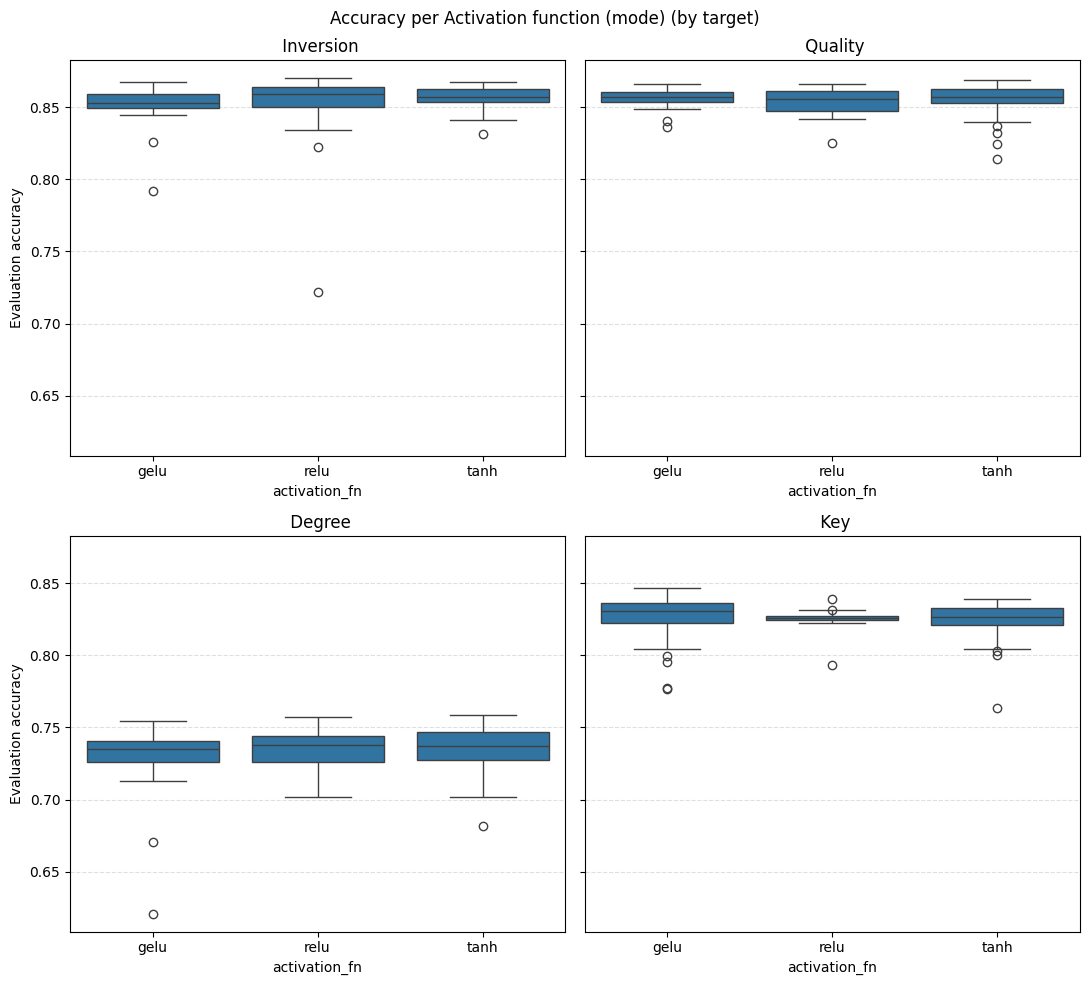

In [41]:
targets =display_four(data_filtered_copy, parameter= "activation_fn", mode = True, box = True, full_name="Activation function (mode)")

# New hpo

In [36]:
import pandas as pd 
import optuna
import numpy as np
def filter_optuna_study(study):
    df = study.trials_dataframe()
    df_filtered = df[df["state"].isin(["COMPLETE", "PRUNED"]) ]
    date_cols = [col for col in df_filtered.columns if "datetime" in col or "duration" in col]
    df_filtered = df_filtered.drop(columns = date_cols, axis = 1)

    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.drop(columns = ["index"], axis = 1)
    df_filtered["value"] = df_filtered["value"]* 100
    print(f"Size of filtered df is {len(df_filtered)}")
    return df_filtered
from optuna.distributions import (
    UniformDistribution, LogUniformDistribution,
    IntUniformDistribution, CategoricalDistribution
)

def extract_search_space(study):
    space = {}
    for trial in study.trials:
        for name, dist in trial.distributions.items():
            if name in space:
                continue
            if hasattr(dist, "low"):
                space[name] = (dist.low, dist.high)
            elif isinstance(dist, CategoricalDistribution):
                space[name] = list(dist.choices)
    return space
def get_pruned(df, tail = 10):
    last_df = df.tail(tail)
    df_pruned_last = last_df[last_df["state"] == "PRUNED"]
    print(f"Percentage of pruned runs is {len(df_pruned_last) / len(last_df)* 100}% ")
def get_study_info(study_name, storage_path, pruned = True, tail= None):
    study = optuna.load_study(
        study_name=study_name,
        storage=storage_path
    )
    df_filtered = filter_optuna_study(study)
    search_space = extract_search_space(study)
    print(search_space)
    if pruned:
        get_pruned(df_filtered, tail = tail)
   
    indices = df_filtered["value"].nlargest(10).index
        
    df_filtered_best = df_filtered.loc[indices]
    return df_filtered_best, search_space, df_filtered, study

/home/ui556004/projects/musicbert_hf/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
df_filtered, search_space,df_full, study =get_study_info(storage_path="sqlite:///optuna_nas_new.db", study_name="nas_new", pruned =True, tail = 10)

columns = [ "freeze_layers", "batch_size", "learning_rate"]
columns = ["number", "value", "state"] +["params_" + col for col in columns] 
df_filtered[columns].head(10)

Size of filtered df is 75
{'num_linear_layers_quality': (1, 6), 'layer_dim_quality_0': (32, 768), 'layer_dim_quality_1': (32, 768), 'layer_dim_quality_2': (32, 768), 'layer_dim_quality_3': (32, 768), 'layer_dim_quality_4': (32, 768), 'layer_dim_quality_5': (32, 768), 'activation_fn_quality_0': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_1': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_2': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_3': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_4': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_5': ['tanh', 'relu', 'gelu'], 'input_dropout_quality': (0.0, 0.5), 'pooler_dropout_quality_0': (0.0, 0.5), 'pooler_dropout_quality_1': (0.0, 0.5), 'pooler_dropout_quality_2': (0.0, 0.5), 'pooler_dropout_quality_3': (0.0, 0.5), 'pooler_dropout_quality_4': (0.0, 0.5), 'pooler_dropout_quality_5': (0.0, 0.5), 'normalisation_quality_0': ['none', 'layer'], 'normalisation_quality_1': ['none', 'layer'], 'normalisation_quality_2': ['none', 'layer'],

,number,value,state,params_freeze_layers,params_batch_size,params_learning_rate
3,3,83.640902,COMPLETE,0,8,0.000304
27,27,83.476833,COMPLETE,0,4,0.000121
15,15,83.418265,COMPLETE,0,8,0.000215
55,57,83.401883,COMPLETE,3,32,0.000312
37,38,83.390783,COMPLETE,2,32,0.000281
70,72,83.376757,COMPLETE,1,32,0.000306
43,44,83.272398,COMPLETE,1,32,0.000264
72,74,83.086022,PRUNED,1,32,0.000244
13,13,83.064180,COMPLETE,1,8,0.000139
0,0,83.063823,COMPLETE,8,4,0.000059


In [26]:
from optuna.importance import get_param_importances, FanovaImportanceEvaluator
importances = []

for _ in range(10):
    imp = optuna.importance.get_param_importances(
        study, evaluator=FanovaImportanceEvaluator()
    )
    s = sum(imp.values())
    importances.append({k: v / s for k, v in imp.items()})

importance_avg = {
    k: sum(d.get(k, 0.0) for d in importances) / len(importances)
    for k in importances[0]
}
print(importance_avg)
print(sum(list(importance_avg.values())))
print({k: v for k, v in sorted(importance_avg.items(), key=lambda item: item[1], reverse=True)})

{'freeze_layers': np.float64(0.048429789405793434), 'pooler_dropout_key_pc_mode_5': np.float64(0.06438904256195298), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_0': np.float64(0.06254636556293013), 'pooler_dropout_quality_1': np.float64(0.027947224620427823), 'normalisation_quality_2': np.float64(0.07325286193720784), 'num_linear_layers_quality': np.float64(0.023818827151947948), 'pooler_dropout_quality_4': np.float64(0.03896959631501083), 'activation_fn_key_pc_mode_5': np.float64(0.0534529404218263), 'num_linear_layers_inversion': np.float64(0.02068955691127567), 'activation_fn_inversion_3': np.float64(0.018924781265257425), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_4': np.float64(0.015517213961109225), 'pooler_dropout_inversion_1': np.float64(0.01702587243021198), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_1': np.float64(0.013764320337966263), 'layer_

In [8]:
df_filtered, search_space =get_study_info(storage_path="sqlite:///optuna_nas.db", study_name="new_nas", pruned =True, tail = 10)
df_filtered.head(10)

Size of filtered df is 51
{'num_linear_layers_quality': (1, 6), 'layer_dim_quality_0': (32, 768), 'layer_dim_quality_1': (32, 768), 'layer_dim_quality_2': (32, 768), 'layer_dim_quality_3': (32, 768), 'layer_dim_quality_4': (32, 768), 'layer_dim_quality_5': (32, 768), 'activation_fn_quality_0': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_1': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_2': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_3': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_4': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_5': ['tanh', 'relu', 'gelu'], 'input_dropout_quality': (0.0, 0.5), 'pooler_dropout_quality_0': (0.0, 0.5), 'pooler_dropout_quality_1': (0.0, 0.5), 'pooler_dropout_quality_2': (0.0, 0.5), 'pooler_dropout_quality_3': (0.0, 0.5), 'pooler_dropout_quality_4': (0.0, 0.5), 'pooler_dropout_quality_5': (0.0, 0.5), 'normalisation_quality_0': ['none', 'layer'], 'normalisation_quality_1': ['none', 'layer'], 'normalisation_quality_2': ['none', 'layer'],

,number,value,params_activation_fn_inversion_0,params_activation_fn_inversion_1,params_activation_fn_inversion_2,params_activation_fn_inversion_3,params_activation_fn_inversion_4,params_activation_fn_inversion_5,params_activation_fn_key_pc_mode_0,params_activation_fn_key_pc_mode_1,...,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_3,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_4,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_5,params_pooler_dropout_quality_0,params_pooler_dropout_quality_1,params_pooler_dropout_quality_2,params_pooler_dropout_quality_3,params_pooler_dropout_quality_4,params_pooler_dropout_quality_5,state
0,0,82.869953,relu,relu,gelu,gelu,gelu,relu,relu,relu,...,0.316153,0.316765,0.267887,0.099837,0.257117,0.296207,0.023225,0.303772,0.085262,COMPLETE
28,28,82.772589,relu,gelu,gelu,gelu,gelu,gelu,gelu,relu,...,0.387794,0.099435,0.154555,0.022376,0.382447,0.409385,0.491912,0.117194,0.415451,COMPLETE
3,3,82.451233,relu,relu,gelu,gelu,gelu,gelu,gelu,relu,...,0.404937,0.127320,0.340751,0.198271,0.311043,0.431182,0.474760,0.073537,0.463294,COMPLETE
4,4,81.637134,relu,relu,tanh,relu,gelu,gelu,gelu,gelu,...,0.121586,0.361133,0.427848,0.069636,0.397013,0.310036,0.266731,0.446946,0.394299,COMPLETE
7,7,81.312637,gelu,tanh,gelu,tanh,tanh,gelu,relu,tanh,...,0.014987,0.153965,0.352340,0.015793,0.468106,0.025986,0.270648,0.354530,0.435485,COMPLETE
2,2,81.271735,tanh,gelu,tanh,relu,tanh,relu,gelu,gelu,...,0.234347,0.207410,0.136704,0.495253,0.206309,0.186009,0.388206,0.170402,0.465379,COMPLETE
1,1,81.038820,gelu,gelu,gelu,tanh,gelu,tanh,gelu,tanh,...,0.216926,0.199252,0.307925,0.002531,0.080404,0.274367,0.345948,0.325981,0.112135,COMPLETE
8,8,74.922659,gelu,gelu,relu,relu,gelu,gelu,gelu,gelu,...,0.330920,0.278892,0.365325,0.272245,0.002879,0.162293,0.183231,0.198086,0.347734,PRUNED
27,27,74.524068,relu,relu,gelu,relu,gelu,gelu,gelu,gelu,...,0.048337,0.367960,0.441531,0.012412,0.259188,0.315348,0.232535,0.482105,0.215872,PRUNED
18,18,72.950085,tanh,tanh,gelu,gelu,gelu,relu,gelu,relu,...,0.420268,0.413993,0.208392,0.164923,0.311280,0.250264,0.004057,0.244585,0.106649,PRUNED


In [2]:
df_filtered, search_space =get_study_info(storage_path="sqlite:///optuna_nas_new.db", study_name="nas", pruned =True, tail = 10)
df_filtered.head(10)

Size of filtered df is 125
{'num_linear_layers_quality': (1, 6), 'layer_dim_quality_0': (32, 768), 'layer_dim_quality_1': (32, 768), 'layer_dim_quality_2': (32, 768), 'layer_dim_quality_3': (32, 768), 'layer_dim_quality_4': (32, 768), 'layer_dim_quality_5': (32, 768), 'activation_fn_quality_0': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_1': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_2': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_3': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_4': ['tanh', 'relu', 'gelu'], 'activation_fn_quality_5': ['tanh', 'relu', 'gelu'], 'input_dropout_quality': (0.0, 0.5), 'pooler_dropout_quality_0': (0.0, 0.5), 'pooler_dropout_quality_1': (0.0, 0.5), 'pooler_dropout_quality_2': (0.0, 0.5), 'pooler_dropout_quality_3': (0.0, 0.5), 'pooler_dropout_quality_4': (0.0, 0.5), 'pooler_dropout_quality_5': (0.0, 0.5), 'normalisation_quality_0': ['none', 'layer'], 'normalisation_quality_1': ['none', 'layer'], 'normalisation_quality_2': ['none', 'layer']

,number,value,params_activation_fn_inversion_0,params_activation_fn_inversion_1,params_activation_fn_inversion_2,params_activation_fn_inversion_3,params_activation_fn_inversion_4,params_activation_fn_inversion_5,params_activation_fn_key_pc_mode_0,params_activation_fn_key_pc_mode_1,...,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_3,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_4,params_pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_5,params_pooler_dropout_quality_0,params_pooler_dropout_quality_1,params_pooler_dropout_quality_2,params_pooler_dropout_quality_3,params_pooler_dropout_quality_4,params_pooler_dropout_quality_5,state
56,57,83.039910,gelu,relu,relu,gelu,gelu,gelu,gelu,gelu,...,0.297709,0.126551,0.248044,0.248392,0.108340,0.412927,0.259241,0.174034,0.376250,COMPLETE
28,28,82.900682,relu,relu,gelu,relu,tanh,gelu,gelu,relu,...,0.310640,0.136309,0.443858,0.183811,0.388033,0.341690,0.218017,0.011810,0.425671,COMPLETE
13,13,82.895685,tanh,gelu,relu,gelu,gelu,relu,tanh,relu,...,0.398246,0.150001,0.361770,0.198169,0.302216,0.353013,0.449545,0.239347,0.464986,COMPLETE
0,0,82.870809,relu,relu,gelu,gelu,gelu,relu,relu,relu,...,0.316153,0.316765,0.267887,0.099837,0.257117,0.296207,0.023225,0.303772,0.085262,COMPLETE
26,26,82.855498,relu,relu,gelu,relu,relu,gelu,gelu,relu,...,0.339771,0.046352,0.422011,0.291249,0.278387,0.395411,0.362133,0.034109,0.457690,COMPLETE
34,35,82.720874,tanh,relu,relu,gelu,gelu,relu,tanh,relu,...,0.391403,0.300536,0.221689,0.099240,0.406944,0.220968,0.466513,0.288005,0.442233,COMPLETE
3,3,82.577827,relu,relu,gelu,gelu,gelu,gelu,gelu,relu,...,0.404937,0.127320,0.340751,0.198271,0.311043,0.431182,0.474760,0.073537,0.463294,COMPLETE
11,11,82.538067,relu,gelu,gelu,gelu,gelu,relu,relu,relu,...,0.227311,0.404486,0.446683,0.130773,0.271977,0.092191,0.158819,0.319798,0.055151,COMPLETE
47,48,82.387775,tanh,gelu,relu,gelu,gelu,relu,tanh,relu,...,0.434287,0.144130,0.298770,0.230099,0.062856,0.310828,0.420694,0.137914,0.314687,COMPLETE
16,16,82.373891,relu,gelu,relu,tanh,gelu,relu,relu,relu,...,0.429339,0.307314,0.323860,0.197543,0.280667,0.213418,0.233556,0.170316,0.454268,COMPLETE


## result comparison

In [38]:
def get_results_to_table(path, name,  columns_to_keep = []):
    df = pd.read_csv(path, sep= ":", header = None, names = ["name", name])
    df =df.set_index("name").T
    degree = "primary_alteration_primary_degree_secondary_alteration_secondary_degree"
    cols_w_degree_modified = {col: col.replace(degree, "degree") for col in df.columns if degree in col }
    df = df.rename(columns=cols_w_degree_modified)
    if len(columns_to_keep) > 0:
        columns = [x for x in df.columns.values if any(k in x for k in columns_to_keep) ]
        df = df[columns]
    return df

In [39]:
import pandas as pd
columns_to_keep = ["accuracy","entropy"]
#df_trial_28 = get_results_to_table("outputs/hpo_nas_optuna_nas_new_trial_28.txt", name = "trial 28", columns_to_keep=columns_to_keep  ) #["accuracy", "eval_loss", "entropy"]
df_baseline = get_results_to_table("outputs/baseline.txt", name = "baseline",columns_to_keep= columns_to_keep )
# df_trial_57 = get_results_to_table("outputs/hpo_nas_optuna_nas_new_trial_57.txt", name = "trial 57",columns_to_keep=columns_to_keep )
df_trial_3 = get_results_to_table("outputs/hpo_nas_new_optuna_nas_new_trial_3.txt", name = "trial 3",columns_to_keep= columns_to_keep )
df_trial_27= get_results_to_table("outputs/hpo_nas_new_optuna_nas_new_trial_27.txt", name = "trial 27",columns_to_keep= columns_to_keep )
pd.concat([df_baseline,   df_trial_3, df_trial_27], axis = 0)

name,eval_quality_accuracy,eval_quality_top3_accuracy,eval_quality_entropy_top3,eval_quality_entropy_top3_norm,eval_inversion_accuracy,eval_inversion_top3_accuracy,eval_inversion_entropy_top3,eval_inversion_entropy_top3_norm,eval_key_pc_mode_accuracy,eval_key_pc_mode_top3_accuracy,eval_key_pc_mode_entropy_top3,eval_key_pc_mode_entropy_top3_norm,eval_degree_accuracy,eval_degree_top3_accuracy,eval_degree_entropy_top3,eval_degree_entropy_top3_norm,eval_accuracy,eval_top3_accuracy
baseline,0.8653,0.9261,0.2026,0.1844,0.8730,0.9390,0.1923,0.1750,0.8152,0.8746,0.1694,0.1542,0.7557,0.8410,0.2850,0.2594,0.8273,0.8952
trial 3,0.8646,0.9302,0.2249,0.2048,0.8706,0.9429,0.2370,0.2158,0.8159,0.8820,0.1906,0.1735,0.7582,0.8417,0.2945,0.2680,0.8273,0.8992
trial 27,0.8697,0.9078,0.0762,0.0694,0.8820,0.8996,0.0580,0.0528,0.9182,0.9436,0.0606,0.0551,0.8279,0.8809,0.0994,0.0905,0.8744,0.9080


In [3]:
import pandas as pd
df_baseline = get_results_to_table("outputs/baseline.txt", name = "baseline",columns_to_keep= ["accuracy", "eval_loss"])
df_trial_0 = get_results_to_table("outputs/hpo_new_nas_trial_0.txt", name = "trial 0", columns_to_keep= ["accuracy", "eval_loss"])
df_trial_28 = get_results_to_table("outputs/hpo_new_nas_trial_28.txt", name = "trial 28", columns_to_keep= ["accuracy", "eval_loss"])
pd.concat([df_baseline, df_trial_0, df_trial_28 ], axis = 0)

name,eval_loss,eval_quality_accuracy,eval_quality_top3_accuracy,eval_inversion_accuracy,eval_inversion_top3_accuracy,eval_key_pc_mode_accuracy,eval_key_pc_mode_top3_accuracy,eval_degree_accuracy,eval_degree_top3_accuracy,eval_accuracy,eval_top3_accuracy
baseline,0.6170,0.8653,0.9261,0.8730,0.9390,0.8152,0.8746,0.7557,0.8410,0.8273,0.8952
trial 0,0.5962,0.8529,0.9347,0.8686,0.9361,0.6725,0.7920,0.7282,0.9339,0.7805,0.8992
trial 28,0.6562,0.8577,0.9273,0.8636,0.9386,0.8088,0.8537,0.7484,0.8246,0.8196,0.8860


In [9]:
import pandas as pd
test_scores_baseline = pd.read_csv("outputs/baseline.txt", sep= ":", header = None, names = ["metric", "value"])
test_scores_baseline = test_scores_baseline.set_index("metric").T
test_scores_baseline

metric,eval_loss,eval_model_preparation_time,eval_quality_precision,eval_quality_recall,eval_quality_accuracy,eval_quality_top3_accuracy,eval_inversion_precision,eval_inversion_recall,eval_inversion_accuracy,eval_inversion_top3_accuracy,...,eval_primary_alteration_primary_degree_secondary_alteration_secondary_degree_recall,eval_primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval_primary_alteration_primary_degree_secondary_alteration_secondary_degree_top3_accuracy,eval_precision,eval_recall,eval_accuracy,eval_top3_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second
value,0.617,0.0015,0.6606,0.6173,0.8653,0.9261,0.8657,0.8464,0.873,0.939,...,0.171,0.7557,0.841,0.6294,0.617,0.8273,0.8952,1322.4177,0.893,0.224


In [60]:
import pandas as pd
import os
root_old = "/hpcwork/ui556004/results/saved_predictions_new/test/predictions"
#oot_new = "/hpcwork/ui556004/results/musicbert_hf/saved_predictions/saved_predictions_trim/test/predictions"
root_new = "/hpcwork/ui556004/results/musicbert_hf/saved_predictions/saved_predictions_baseline_trim/test/predictions"
#"/hpcwork/ui556004/results/musicbert_hf/saved_predictions/saved_predictions_baseline_trim/test/predictions"
file_name = "inversion.txt"
file_new = pd.read_csv(os.path.join(root_new, file_name), header=None,)
file_old = pd.read_csv(os.path.join(root_old, file_name), header=None,)
print(f"new: {len(file_new)}, old: {len(file_old)}")

new: 1181, old: 1181


In [41]:
file_old.iloc[0]

0    M M M M M M M M M M M M M M M M Mm7 Mm7 Mm7 Mm...
Name: 0, dtype: object

In [61]:
print(file_new.iloc[0].values[0].split(" "))

['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '0.0', '0.0']


In [62]:
print(file_old.iloc[0].values[0].split(" "))

['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '0.0', '0.0']


In [36]:
over_2 = 0
size = len(file_old)
for i in range(size):
    size_new = len(file_new.iloc[i].values[0].split(" "))
    size_old= len(file_old.iloc[i].values[0].split(" "))
    if (size_new != size_old):
        over_2 += 1
print(over_2 /size * 100)

0.0
